In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym

In [3]:
# Mass
m = 0.044

# Principle moments of inertia
J_y = 1.60e-05

# Acceleration of gravity
g = 9.81

# Pendulum parameters
l_pen = 150e-3 # maybe m
m_pen = 0.006

# state: [o_x, o_x_dot, o_z, o_z_dot, theta, theta_dot, alpha, alpha_dot]

# inputs: [tau_y, f_z]

In [67]:
def propogate_state(state, inputs):
    state_dot = np.zeros(8)
    state_dot[0] = state[1]
    state_dot[1] = (-inputs[1]*m_pen*np.sin(state[6] - state[4])*np.cos(state[6]) + m*(state[7]**2 * l_pen * m_pen * np.sin(state[6]) + inputs[1]*np.sin(state[4])))/(m*(m+m_pen))
    state_dot[2] = state[3]
    state_dot[3] = (inputs[1]*m_pen*np.sin(state[6] - state[4])*np.sin(state[6]) + m*(state[7]**2 * l_pen * m_pen * np.cos(state[6]) + inputs[1]*np.cos(state[4]) - g*m - g*m_pen))/(m*(m+m_pen))
    state_dot[4] = state[5]
    state_dot[5] = inputs[0]/J_y
    state_dot[6] = state[7]
    state_dot[7] = inputs[1]*np.sin(state[6] - state[4])/(l_pen*m)
    return state_dot

In [68]:
def rk4(state, inputs, delta_t):
    y1 = propogate_state(state, inputs)
    y2 = propogate_state(state + 1/2*delta_t*y1, inputs)
    y3 = propogate_state(state + 1/2*delta_t*y2, inputs)
    y4 = propogate_state(state + delta_t*y3, inputs)

    return state + 1/6 * delta_t *(y1 + 2*y2 + 2*y3 + y4)


In [96]:
def controller(state, state_des):
    K = np.array([[-3.16227766e-04, -5.62372285e-04, -3.75118589e-18,
        -3.58037631e-18,  1.18799716e-02,  6.92935127e-04,
        -1.52344145e-02, -1.80434720e-03],
       [ 2.70362764e-15,  2.30331138e-15,  3.16227766e-01,
         3.62798534e-01, -4.13236788e-14, -1.14572042e-15,
         6.80987900e-14,  7.57825355e-15]])
    u = -K @ (state - state_des)
    u[1] += (m + m_pen)*g
    return u

In [97]:
def sim(times,inputs_data, state_data, state_des, delta_t):
    for i, time in enumerate(times):

        if i == 0:
            continue

        else:
            inputs_data[i-1] = controller(state_data[i-1], state_des)
            state_data[i] = rk4(state_data[i-1], inputs_data[i-1], delta_t)

In [115]:
delta_t = 0.01
total_t = 3
times = np.arange(0, total_t + delta_t/2, delta_t)
inputs_data = np.zeros((len(times), 2))
state_data = np.zeros((len(times), 8))
state_des = np.array([0., 0., 3.0, 0., 0., 0., 0., 0.])
state_data[0] = np.array([1., 0., 3.0, 0., 0., 0., 0.0, 0.])

# Run sim
sim(times, inputs_data, state_data, state_des, delta_t)

In [116]:
inputs_data

array([[ 3.16227766e-04,  4.90500000e-01],
       [ 1.67104148e-04,  4.90500004e-01],
       [ 6.21614094e-05,  4.90500096e-01],
       [-9.99409599e-06,  4.90500561e-01],
       [-5.79401139e-05,  4.90501793e-01],
       [-8.81266265e-05,  4.90504106e-01],
       [-1.05396184e-04,  4.90507610e-01],
       [-1.13377330e-04,  4.90512168e-01],
       [-1.14782052e-04,  4.90517427e-01],
       [-1.11630666e-04,  4.90522886e-01],
       [-1.05421845e-04,  4.90527986e-01],
       [-9.72611917e-05,  4.90532189e-01],
       [-8.79584516e-05,  4.90535048e-01],
       [-7.81010348e-05,  4.90536257e-01],
       [-6.81095989e-05,  4.90535678e-01],
       [-5.82800622e-05,  4.90533353e-01],
       [-4.88153435e-05,  4.90529496e-01],
       [-3.98493233e-05,  4.90524480e-01],
       [-3.14649157e-05,  4.90518809e-01],
       [-2.37076823e-05,  4.90513087e-01],
       [-1.65960737e-05,  4.90507992e-01],
       [-1.01291199e-05,  4.90504235e-01],
       [-4.29219307e-06,  4.90502538e-01],
       [ 9.

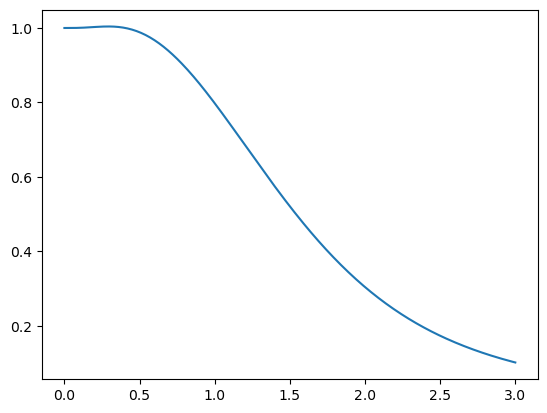

In [118]:
plt.plot(times, state_data[:,0])

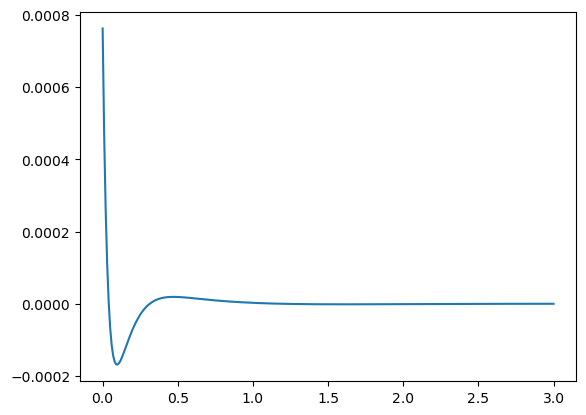

In [113]:
plt.plot(times, inputs_data[:,0])